In [1]:
import pickle

In [2]:
with open("args.curves", 'rb') as pickle_file:
    curve_fragment = pickle.load(pickle_file)

<IPython.core.display.Javascript object>


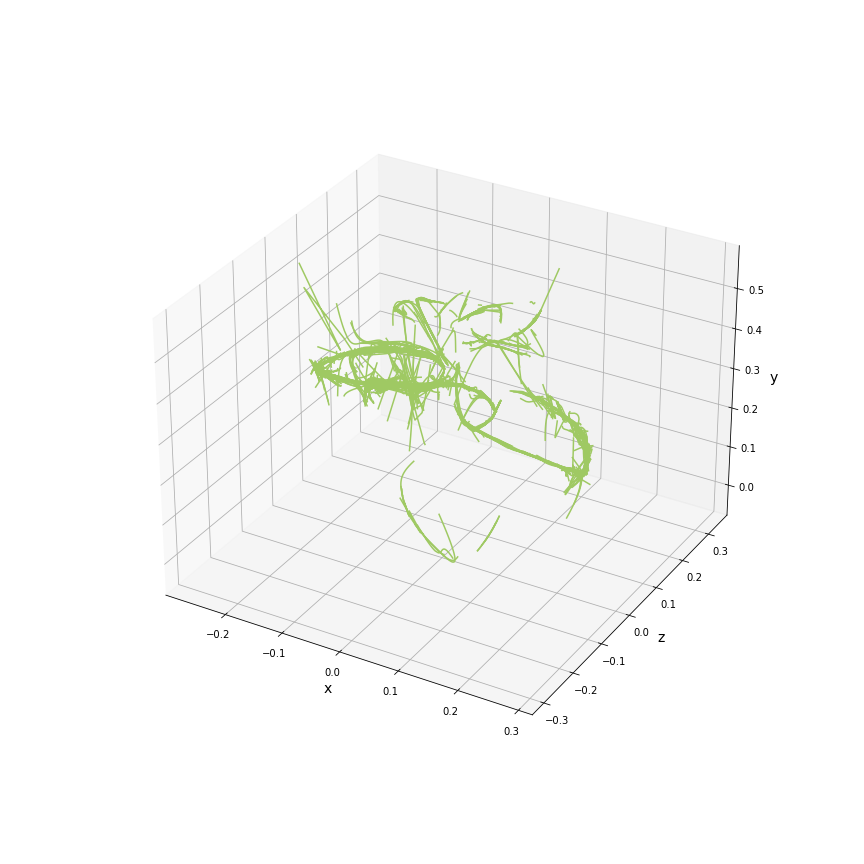

In [3]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%matplotlib notebook

def plot_graph():
    for frag in curve_fragment:
        if frag.size == 0:
            continue
        #print(frag)
        x = frag[:,0]
        y = frag[:,1]
        z = frag[:,2]
        data = [x,y,z]
        
        try:
            if len(x)<2:
                continue
            tck, u = interpolate.splprep(data, k=3)
            new = interpolate.splev(u, tck, der=0)
            ax.plot(new[0], new[2], new[1],"-",c="#9FC963")
        except ValueError:
            pass
        except TypeError:
            pass
        
        
        #ax.plot(x, z, y,"-")

fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
#ax.set_box_aspect((1,1,1))
#ax.set_xticks(np.arange(-4,4,1))
#ax.set_yticks(np.arange(-4,4,1))
#ax.set_zticks(np.arange(-2,9,1))

plot_graph()

In [4]:
import itertools
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [5]:
flatten_curve_frag = np.array(list(itertools.chain.from_iterable(curve_fragment)))
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(flatten_curve_frag)

In [6]:
with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=0.01, min_points=10, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])

[Open3D DEBUG] Precompute neighbors.
[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 19
point cloud has 19 clusters
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: 要求された変換操作はサポートされていません。 


<IPython.core.display.Javascript object>


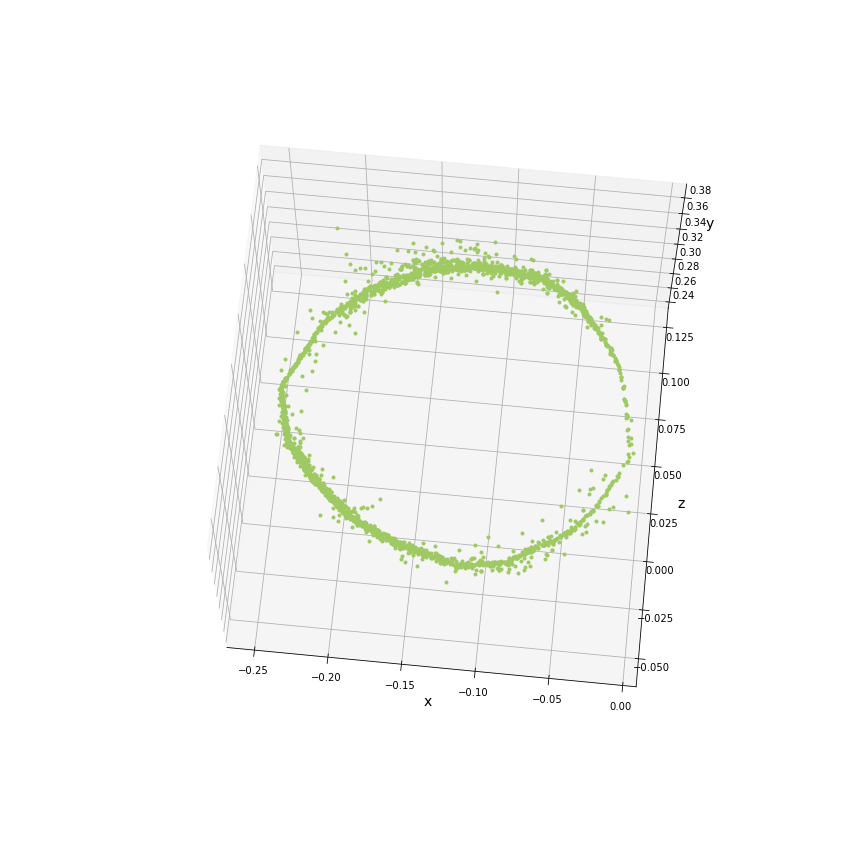

In [7]:
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
i = 0
for x,y,z in flatten_curve_frag[np.where(labels == 0)]:
    if i%10==0:
        ax.plot(x, z, y,".",c="#9FC963")
    i+=1

In [7]:
cluster = flatten_curve_frag[np.where(labels == 0)]


In [8]:
import sklearn
from sklearn.decomposition import PCA

In [9]:
pca = PCA()
pca.fit(cluster)
feature = pca.transform(cluster)

<IPython.core.display.Javascript object>


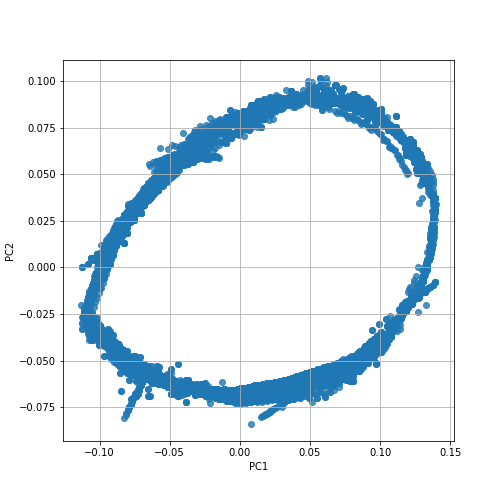

In [10]:
plt.figure(figsize=(7, 7))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [11]:
r = (feature[:, 0]**2 + feature[:, 1]**2)**(1/2)
cos = feature[:, 0]/r
sin = feature[:, 1]/r

arccos = np.arccos(cos)
arcsin = np.arcsin(sin)
arccos_m = -arccos
arcsin_m = -np.pi -arcsin
arcsin_p = np.pi - arcsin

In [12]:
def same_checker(ls):
    for i, num1 in enumerate(ls):
        for j, num2 in enumerate(ls):
            if i == j:
                continue
            if np.abs(num1 - num2) <0.0005:
                return num1

In [13]:
feature_theta = []
for temp_list in zip(arccos, arcsin, arccos_m, arcsin_m, arcsin_p):
    theta = same_checker(temp_list)
    feature_theta.append(theta)
feature_theta = np.array(feature_theta)

In [14]:
cluster_ex_nan = cluster[np.where(feature_theta != None)]
feature_theta_ex_nan = feature_theta[np.where(feature_theta != None)]
sorted_idx = np.argsort(feature_theta_ex_nan)
sorted_cluster = cluster_ex_nan[sorted_idx]

In [15]:
from scipy import interpolate
from scipy import ndimage

In [16]:
x = sorted_cluster[:,0]
y = sorted_cluster[:,2]
z = sorted_cluster[:,1]
data = [x,y,z]

jump = np.sqrt(np.diff(x)**2 + np.diff(y)**2 + np.diff(z)**2) 
smooth_jump = ndimage.gaussian_filter1d(jump, 5, mode='wrap')  # window of size 5 is arbitrary
limit = 2*np.median(smooth_jump)    # factor 2 is arbitrary
xn, yn, zn = x[:-1], y[:-1], z[:-1]
xn = xn[(jump > 0) & (smooth_jump < limit)]
yn = yn[(jump > 0) & (smooth_jump < limit)]
zn = zn[(jump > 0) & (smooth_jump < limit)]

data = [xn,yn,zn]

In [17]:
tck, u = interpolate.splprep(data, s=0.19, k=3, per=1)
new = interpolate.splev(u, tck, der=0)
prossed_data = np.array(new)

C:\Users\murata\anaconda3\envs\open3d\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[0][5337]=x[0][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
C:\Users\murata\anaconda3\envs\open3d\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[1][5337]=x[1][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %
C:\Users\murata\anaconda3\envs\open3d\lib\site-packages\scipy\interpolate\_fitpack_impl.py:226: RuntimeWarning: Setting x[2][5337]=x[2][0]
  warnings.warn(RuntimeWarning('Setting x[%d][%d]=x[%d][0]' %


<IPython.core.display.Javascript object>


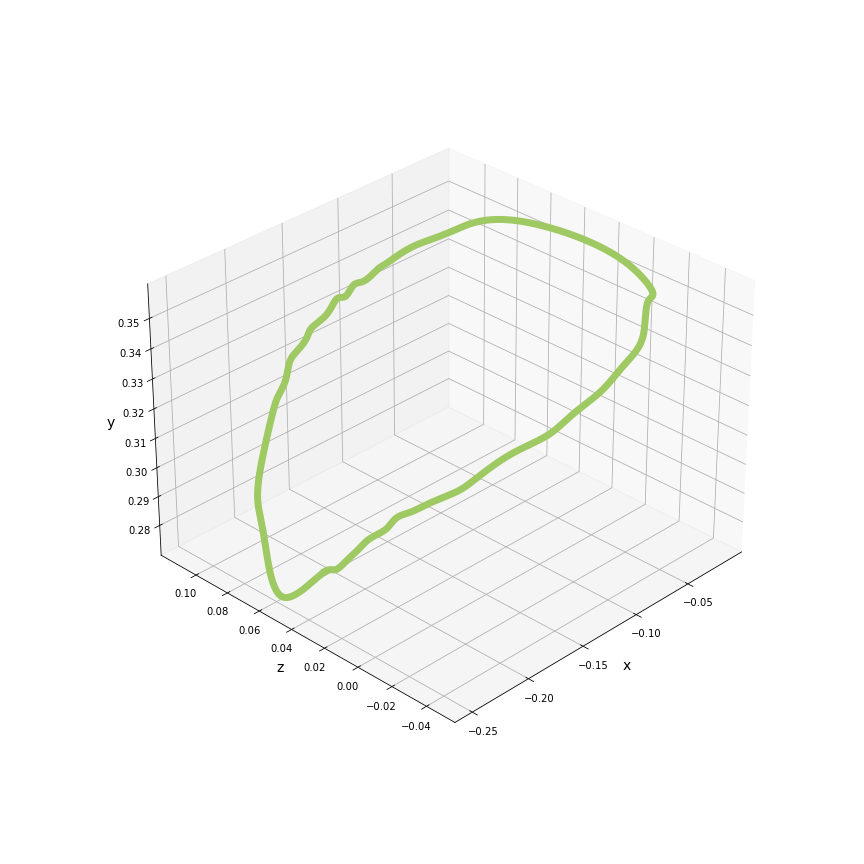

In [22]:
fig = plt.figure(figsize = (12, 12))
fig.patch.set_alpha(0.)
# 3DAxesを追加
ax = fig.add_subplot(111, projection='3d')

# 軸ラベルを設定
ax.set_xlabel("x", size = 14)
ax.set_ylabel("z", size = 14)
ax.set_zlabel("y", size = 14)
x, y, z = prossed_data[0],prossed_data[2],prossed_data[1]
ax.plot(x, z, y,"-",c="#9FC963",linewidth = 7.0)